In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from matplotlib.pyplot import cm
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the regular expression library and preparing the data for further analysis
import re
# Load models used for prediction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [4]:
import nltk


In [11]:
variables = pd.read_csv('sentence ordered var.csv')

In [12]:
variables

,Unnamed: 0,ID,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup
0,0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
1,1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
2,2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
3,3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
4,4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
...,...,...,...,...,...,...,...,...,...
23831,23831,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23832,23832,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23833,23833,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23834,23834,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0


In [6]:
#importing metrics for future use
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [7]:
#to display the relevant criteria for each model
def display_results(y_actual, y_predicted): 
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    print("MSE = " ,mean_squared_error(y_actual, y_predicted))
    print("Confusion Matrix \n" ,confusion_matrix(y_actual, y_predicted))

# to generate auc-roc curve
def generate_auc_roc_curve(model, X_test, Y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show() #[6]

In [8]:
#load RoBERTa matrix
matrix = pd.read_csv('CLEAN ROBERTA MATRIX.csv').iloc[:, 1:]

In [9]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.266187,-0.660178,-0.371666,-0.630971,-0.358803,-1.391885,0.160033,0.478119,0.212221,1.083352,...,0.428783,-1.124803,-0.256399,0.317885,-0.474741,0.325401,-0.264061,-0.664652,-1.497020,0.201376
1,1.456210,0.427500,-0.721851,-1.493967,1.081013,-0.480533,-0.413014,0.285254,-0.340345,1.048345,...,0.122286,0.391398,-0.523072,-0.248091,0.732693,0.897241,-0.166863,0.365331,-0.282128,0.094608
2,0.739583,-0.245726,-0.108649,-0.393256,0.645251,-1.167343,-0.528575,1.418152,-0.453724,-0.278970,...,0.252741,-0.724660,0.127723,-0.177164,1.657929,1.665471,1.373241,-0.004133,-0.453870,0.624380
3,0.374601,-0.150858,-0.013419,-1.022840,1.164619,-0.045881,0.028101,1.061302,-0.381707,0.609979,...,-0.123810,-0.222101,-1.292111,-0.434329,1.273648,1.538113,-0.262821,0.068657,-1.412173,-1.031423
4,-1.297149,0.402011,-0.468558,-1.139185,-0.013028,-0.644339,0.627444,-0.580150,-0.084935,0.822124,...,0.456621,-1.399169,-0.293569,0.741714,1.205895,1.705837,0.385911,-0.196678,-0.730132,-0.134583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23831,1.515055,-0.431417,-0.304350,-0.466435,-0.280647,-0.873209,0.030019,0.229390,-0.455538,-0.576342,...,0.929256,-0.176715,-0.872528,0.681049,0.122796,0.489373,-0.130842,0.018986,0.269465,-1.186915
23832,-0.468761,-0.813230,0.421769,0.759459,0.091138,-0.172827,-0.149205,-0.041261,0.283715,0.335454,...,1.338163,-0.204426,0.074674,1.886328,1.093886,-0.110166,0.149022,0.564670,1.115814,-0.121593
23833,0.440848,-0.398213,-0.204516,-0.179232,1.043316,0.164469,0.402168,-0.003115,-0.021793,-0.256044,...,-0.553790,-0.429566,-0.554298,0.490498,0.878418,-0.329386,0.798189,-0.151085,0.666669,-0.363450
23834,-0.515678,0.541302,0.164292,0.520151,0.775367,0.363872,1.471387,-0.050492,-1.319565,0.956830,...,-0.292073,0.330839,0.187843,-0.371171,-0.284027,0.100263,-0.464110,1.139689,-2.584928,-0.620282


In [13]:
X = matrix
y = variables["Gender"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
y_train.value_counts()

0    9076
1    8801
Name: Gender, dtype: int64

In [16]:
y_test.value_counts()

0    3001
1    2958
Name: Gender, dtype: int64

In [17]:
len(y_test)

5959

In [19]:
#Logistic
#Instantiate, train - fit, predict and evaluate.
logreg = LogisticRegression(n_jobs=1, C=1e5,solver='lbfgs', max_iter=10000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

display_results(y_test, y_pred)

Accuracy =  0.5947306595066286
Precision =  0.5944347826086956
Recall =  0.5777552400270453
F1 Score =  0.5859763415052288
MSE =  0.4052693404933714
Confusion Matrix 
 [[1835 1166]
 [1249 1709]]


In [16]:
#Confusion matrix
conf2 = metrics.confusion_matrix(y_test, y_pred)
conf2

array([[1835, 1166],
       [1249, 1709]], dtype=int64)

In [17]:
display_results(y_test, y_pred)

Accuracy =  0.5947306595066286
Precision =  0.5944347826086956
Recall =  0.5777552400270453
F1 Score =  0.5859763415052288
MSE =  0.4052693404933714
Confusion Matrix 
 [[1835 1166]
 [1249 1709]]


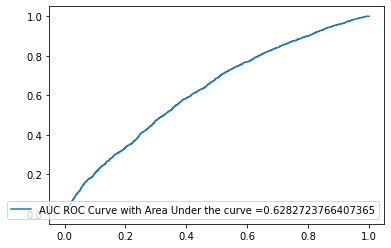

In [18]:
generate_auc_roc_curve(logreg, X_test, y_test)

In [19]:
logreg.coef_

array([[-0.14241056, -0.29679674, -0.53577797, ...,  0.00208323,
         0.00979837, -0.05278285]])

In [20]:
np.sort(logreg.coef_)

array([[-0.58038745, -0.53577797, -0.40133802, ...,  0.35843309,
         0.46265934,  0.46961963]])

In [21]:
print(logreg.coef_ )
feature_rank = np.argsort(logreg.coef_)

[[-0.14241056 -0.29679674 -0.53577797 ...  0.00208323  0.00979837
  -0.05278285]]


In [22]:
feature_rank

array([[547,   2, 369, ..., 629, 472, 539]], dtype=int64)

In [23]:
#SVM classifer
from sklearn import svm
#fit model
clf = svm.SVC(kernel='rbf', C = 0.05)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred)))

Testing accuracy 0.5890250041953348
Testing F1 score: 0.5959412638178517


In [24]:
display_results(y_test, y_pred)

Accuracy =  0.5890250041953348
Precision =  0.5820174025136964
Recall =  0.6105476673427992
F1 Score =  0.5959412638178517
MSE =  0.41097499580466523
Confusion Matrix 
 [[1704 1297]
 [1152 1806]]


In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
#create model
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",  random_state=42),
    n_estimators=100, bootstrap=True, n_jobs=-1, random_state=42)

In [26]:
#fit moel
bag_clf.fit(X_train, y_train)
y_pred_bt = bag_clf.predict(X_test)


In [27]:
display_results(y_test, y_pred_bt)

Accuracy =  0.5984225541198188
Precision =  0.5991575991575991
Recall =  0.577079107505071
F1 Score =  0.5879111417255037
MSE =  0.40157744588018124
Confusion Matrix 
 [[1859 1142]
 [1251 1707]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
#fit model
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [36]:
display_results(y_test, y_pred_rf)

Accuracy =  0.615203893270683
Precision =  0.6107226107226107
Recall =  0.6200135226504395
F1 Score =  0.6153329978191578
MSE =  0.384796106729317
Confusion Matrix 
 [[1832 1169]
 [1124 1834]]


In [37]:
#get index of sorted importance
feature_rank = np.argsort(rnd_clf.feature_importances_)

In [38]:
feature_rank

array([ 220, 1000,   79, ...,  658,  651,  967], dtype=int64)